## Gender Detection by Voice and Speech Analysis

### About This Dataset
<b>

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers.


The following acoustic properties of each voice are measured and included within the CSV:

    meanfreq: mean frequency (in kHz)
    sd: standard deviation of frequency
    median: median frequency (in kHz)
    Q25: first quantile (in kHz)
    Q75: third quantile (in kHz)
    IQR: interquantile range (in kHz)
    skew: skewness
    kurt: kurtosis
    sp.ent: spectral entropy
    sfm: spectral flatness
    mode: mode frequency
    centroid: frequency centroid
    peakf: peak frequency (frequency with highest energy)
    meanfun: average of fundamental frequency measured across acoustic signal
    minfun: minimum fundamental frequency measured across acoustic signal
    maxfun: maximum fundamental frequency measured across acoustic signal
    meandom: average of dominant frequency measured across acoustic signal
    mindom: minimum of dominant frequency measured across acoustic signal
    maxdom: maximum of dominant frequency measured across acoustic signal
    dfrange: range of dominant frequency measured across acoustic signal
    modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
    label: male or female
</b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,NaN,NaN,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df.shape

(3168, 21)

### Data Preparation

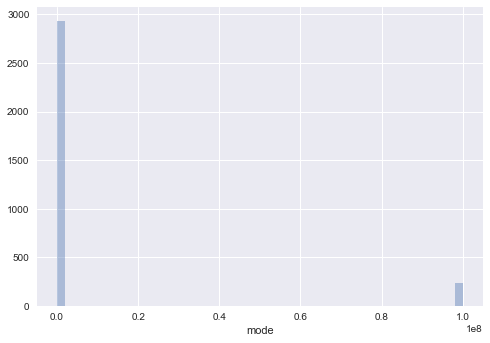

In [4]:
sns.distplot(df['mode'],kde=False)
plt.show()

In [5]:
# if value is 99999999, convert it into NaN
df.loc[df['mode'].astype('float') == 99999999, 'mode'] = np.nan

In [6]:
df.isnull().sum()

meanfreq      0
sd            0
median        0
Q25           0
Q75           0
IQR           0
skew          0
kurt          0
sp.ent        0
sfm           0
mode        236
centroid      0
meanfun       0
minfun        0
maxfun        0
meandom       0
mindom        0
maxdom        0
dfrange      65
modindx      65
label         0
dtype: int64

### Filling in missing data

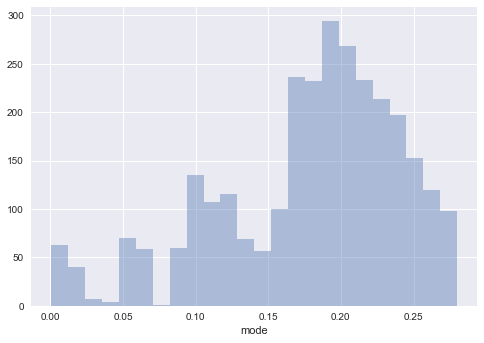

In [7]:
sns.distplot(df['mode'].dropna(), kde=False)
plt.show()

In [8]:
# filling in missing data with median value
df.loc[df['mode'].isnull(), 'mode'] = df['mode'].median()

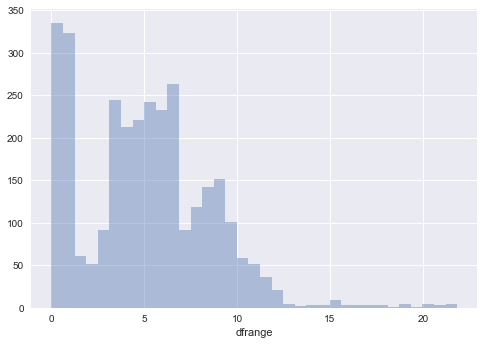

In [9]:
sns.distplot(df['dfrange'].dropna(), kde=False)
plt.show()

In [10]:
# Since missing data rate is low, filling in missing data with 0
df.loc[df['dfrange'].isnull(), 'dfrange'] = 0

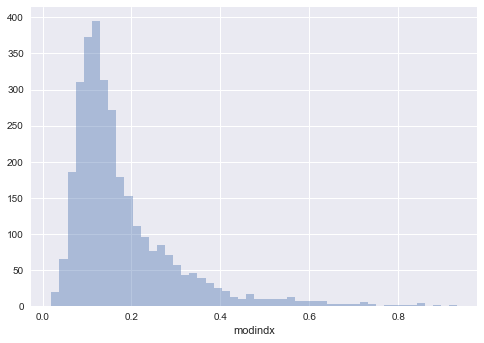

In [11]:
sns.distplot(df['modindx'].dropna(), kde=False)
plt.show()

In [12]:
# Since missing data rate is low, filling in missing data with 0
df.loc[df['modindx'].isnull(), 'modindx'] = 0

In [13]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [14]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.595015,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.363459,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.628381,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.484295,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.498985,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.275336,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.063220,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.030240,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.365348,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.449644,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [15]:
print("Total number of labels:", df.shape[0])
print("Number of male:", df[df.label == 'male'].shape[0])
print("Number of female:", df[df.label == 'female'].shape[0])

Total number of labels: 3168
Number of male: 1584
Number of female: 1584


> We can see the label feature sets have balanced result

In [16]:
# feature sets
X = df.iloc[:, :-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.191951,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.191951,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.191951,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [17]:
# label set
Y = np.array(df['label'])
# male -> 1
# female -> 0
Y[Y == 'male'] = 1
Y[Y == 'female'] = 0
Y = Y.astype('int')
Y

array([1, 1, 1, ..., 0, 0, 0])

### Split training and testing dataset

In [18]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size = 0.75, test_size = 0.25, random_state=1)

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(train_X, train_Y)

Y_pred = logreg.predict(test_X)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(test_Y, Y_pred))

0.906565656566


In [20]:
# Use 5-fold cross-validation to estimate test AUC
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, test_X, test_Y, cv=5, scoring='roc_auc')

# calculate the average MSE
print(scores.mean())

0.849937114573


In [21]:
features = list(X.columns)
features

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'skew',
 'kurt',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx']

### Forward Stepwise Selection

In [22]:
# First round
for f in features:
    xx = train_X[[f]]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

meanfreq 0.710780153644
sd 0.788761224957
median 0.672222194322
Q25 0.860664410026
Q75 0.549698119834
IQR 0.875592969906
skew 0.351891308302
kurt 0.387586458219
sp.ent 0.775566965764
sfm 0.726961448587
mode 0.56469984971
centroid 0.710780153644
meanfun 0.983954576293
minfun 0.581660588114
maxfun 0.569517901211
meandom 0.595539251694
mindom 0.592850096989
maxdom 0.615712566092
dfrange 0.612206348029
modindx 0.493558936646


In [23]:
# 'meanfun' has the highest value -> 0.983954576293
features.remove('meanfun')

In [24]:
# Second round
for f in features: 
    features_col = ['meanfun']
    features_col.append(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

meanfreq 0.978760282465
sd 0.985207189559
median 0.975507708252
Q25 0.954872190964
Q75 0.985599101106
IQR 0.970837120041
skew 0.983428623891
kurt 0.977541076899
sp.ent 0.973968360014
sfm 0.896618021452
mode 0.978196080974
centroid 0.978760282465
minfun 0.983104379287
maxfun 0.982586728441
meandom 0.94494367483
mindom 0.975393685853
maxdom 0.942410812171
dfrange 0.94370712154
modindx 0.983142104854


In [25]:
# 'meanfun + Q75' has the highest value -> 0.985599101106
features.remove('Q75')

In [26]:
# Third round
for f in features: 
    features_col = ['meanfun', 'Q75']
    features_col.append(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

meanfreq 0.985833552706
sd 0.987321472509
median 0.98299787668
Q25 0.965281901011
IQR 0.973316465895
skew 0.985016325874
kurt 0.979006313359
sp.ent 0.977992485654
sfm 0.907611476644
mode 0.98099855989
centroid 0.985833552706
minfun 0.985085575327
maxfun 0.984659874754
meandom 0.950643265172
mindom 0.978861142115
maxdom 0.947752631775
dfrange 0.948963558353
modindx 0.984822118257


In [27]:
# 'meanfun + Q75 + sd' has the highest value -> 0.987321472509
features.remove('sd')

In [28]:
# Fourth round
for f in features: 
    features_col = ['meanfun', 'Q75', 'sd']
    features_col.append(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

meanfreq 0.985047019843
median 0.983075480118
Q25 0.961675308035
IQR 0.970439276306
skew 0.986951310854
kurt 0.980032001544
sp.ent 0.977770064954
sfm 0.909695223851
mode 0.982937472359
centroid 0.985047019843
minfun 0.986758096283
maxfun 0.986186887583
meandom 0.957173235351
mindom 0.981214389535
maxdom 0.954774428823
dfrange 0.955960804651
modindx 0.986824410539


> So "meanfun + Q75 + sd" is the winner

### Backward Stepwise Selection

In [29]:
features = list(X.columns)
features

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'skew',
 'kurt',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx']

In [30]:
# full feature set
average_auc = cross_val_score(logreg, train_X, train_Y, cv=5, scoring='roc_auc').mean()
print(average_auc)

0.921327840459


In [31]:
# Remove one feature
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

meanfreq 0.921586771146
sd 0.921477136581
median 0.921588053424
Q25 0.923220394956
Q75 0.919504787496
IQR 0.915880342446
skew 0.926044930975
kurt 0.927235181299
sp.ent 0.916905729202
sfm 0.92167974621
mode 0.921447549566
centroid 0.921601134325
meanfun 0.859260476922
minfun 0.921317444435
maxfun 0.919935335745
meandom 0.921480352336
mindom 0.921678590348
maxdom 0.921530039969
dfrange 0.921327616227
modindx 0.920533175392


In [32]:
# remove 'kurt' has the highest value -> 0.927235181299
features.remove('kurt')

In [33]:
# Remove two features
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

meanfreq 0.927663744022
sd 0.927748485108
median 0.927264917802
Q25 0.933650117614
Q75 0.925067351369
IQR 0.926581390605
skew 0.925580509839
sp.ent 0.920815231977
sfm 0.929506851399
mode 0.926475148565
centroid 0.9276601983
meanfun 0.858395729216
minfun 0.927256366617
maxfun 0.92477225814
meandom 0.927270385182
mindom 0.928088073303
maxdom 0.927567709229
dfrange 0.927525234365
modindx 0.926092661748


In [34]:
# remove 'kurt, Q25'  has the highest value -> 0.933650117614
features.remove('Q25')

In [35]:
# Remove three features
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

meanfreq 0.934292144827
sd 0.933852511874
median 0.933663498497
Q75 0.931593251675
IQR 0.918026320772
skew 0.931741266336
sp.ent 0.926465344899
sfm 0.942777614745
mode 0.933185577039
centroid 0.934292144827
meanfun 0.84356212757
minfun 0.93357914251
maxfun 0.931189263526
meandom 0.933741889859
mindom 0.934683950952
maxdom 0.934117713329
dfrange 0.93408593554
modindx 0.932787582999


In [36]:
# remove 'kurt, Q25, sfm'  has the highest value -> 0.942777614745
features.remove('sfm')

In [37]:
# Remove four features
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

meanfreq 0.945273547116
sd 0.944460921663
median 0.944702008134
Q75 0.939749472909
IQR 0.942453197455
skew 0.942030834528
sp.ent 0.947810861289
mode 0.941613489385
centroid 0.945245181339
meanfun 0.852149570253
minfun 0.942823740123
maxfun 0.940972027059
meandom 0.943075012971
mindom 0.944672715695
maxdom 0.94361732313
dfrange 0.943500447445
modindx 0.941903558607


In [38]:
# remove 'kurt, Q25, sfm, sp.ent'  has the highest value -> 0.947810861289
features.remove('sp.ent')

In [39]:
# Remove five features
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

meanfreq 0.950218042044
sd 0.950022339231
median 0.949766922584
Q75 0.944548470585
IQR 0.949706057414
skew 0.948503997844
mode 0.946614196807
centroid 0.950218042044
meanfun 0.85563559114
minfun 0.947849939731
maxfun 0.946498835679
meandom 0.948299000052
mindom 0.949928594724
maxdom 0.948699716435
dfrange 0.948600822698
modindx 0.94629700794


In [40]:
# remove 'kurt, Q25, sfm, sp.ent, meanfreq'  has the highest value -> 0.950218042044
features.remove('meanfreq')

In [41]:
# Remove six features
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

sd 0.952564527107
median 0.952528290008
Q75 0.946714524951
IQR 0.949738560641
skew 0.950563155075
mode 0.94914211146
centroid 0.953100176999
meanfun 0.854990767343
minfun 0.950257045741
maxfun 0.949104698195
meandom 0.950830163525
mindom 0.952498226303
maxdom 0.951266203986
dfrange 0.951163495976
modindx 0.948615844807


In [42]:
# remove 'kurt, Q25, sfm, sp.ent, meanfreq, sd'  has the highest value -> 0.952564527107
features.remove('sd')

In [43]:
# Remove seven features
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

median 0.95475458896
Q75 0.949107347052
IQR 0.946323359336
skew 0.952519649369
mode 0.951637549728
centroid 0.955510590229
meanfun 0.85534816587
minfun 0.952607106386
maxfun 0.951370033722
meandom 0.953257917942
mindom 0.954947479284
maxdom 0.953595079878
dfrange 0.953425181365
modindx 0.950951467529


In [44]:
# remove 'kurt, Q25, sfm, sp.ent, meanfreq, sd, centroid'  has the highest value -> 0.955510590229
features.remove('centroid')

In [45]:
# Remove eight features
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

median 0.957786288588
Q75 0.951968553986
IQR 0.943497432412
skew 0.955085775961
mode 0.954751381629
meanfun 0.854080524271
minfun 0.955496272877
maxfun 0.95443614604
meandom 0.956161297558
mindom 0.958119980363
maxdom 0.956576153077
dfrange 0.956416801585
modindx 0.954015344566


In [46]:
# remove 'kurt, Q25, sfm, sp.ent, meanfreq, sd, centroid, median'  has the highest value -> 0.957786288588
features.remove('median')

In [47]:
# Remove nigh features
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

Q75 0.955200822711
IQR 0.939024497525
skew 0.957352898933
mode 0.958152759434
meanfun 0.848715092525
minfun 0.957832444203
maxfun 0.956573962366
meandom 0.958624640893
mindom 0.960268136577
maxdom 0.958855383831
dfrange 0.958681865229
modindx 0.956528791121


In [48]:
# remove 'kurt, Q25, sfm, sp.ent, meanfreq, sd, centroid, median, mindom'  has the highest value -> 0.957832444203
features.remove('mindom')

In [49]:
# Remove ten features
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

Q75 0.95810104359
IQR 0.943264739276
skew 0.959926907156
mode 0.960670243614
meanfun 0.85310323019
minfun 0.960254117635
maxfun 0.959183591191
meandom 0.961241034212
maxdom 0.962679056419
dfrange 0.962402784924
modindx 0.958908423694


In [50]:
# remove 'kurt, Q25, sfm, sp.ent, meanfreq, sd, centroid, median, mindom, maxdom'  
# has the highest value -> 0.962679056419
features.remove('maxdom')

In [51]:
# Remove 11 features
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

Q75 0.960890958905
IQR 0.942646074704
skew 0.962277324925
mode 0.963311758227
meanfun 0.857198272472
minfun 0.962711058441
maxfun 0.96173607363
meandom 0.963906221819
dfrange 0.96402313541
modindx 0.961296130574


In [52]:
# remove 'kurt, Q25, sfm, sp.ent, meanfreq, sd, centroid, median, mindom, maxdom, dfrange'  
# has the highest value -> 0.96402313541
features.remove('dfrange')

In [53]:
# Remove 12 features
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

Q75 0.962238744358
IQR 0.948672660031
skew 0.96313345896
mode 0.964762431792
meanfun 0.862134940396
minfun 0.964108144104
maxfun 0.963278341412
meandom 0.973471933651
modindx 0.962795375767


In [54]:
# remove 'kurt, Q25, sfm, sp.ent, meanfreq, sd, centroid, median, mindom, maxdom, dfrange, meandom'  
# has the highest value ->  0.973471933651
features.remove('meandom')

In [55]:
# Remove 13 features
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

Q75 0.972066389337
IQR 0.978939389961
skew 0.971073762038
mode 0.975428565678
meanfun 0.87724117723
minfun 0.973649163241
maxfun 0.972871889274
modindx 0.972808025541


In [56]:
# remove 'kurt, Q25, sfm, sp.ent, meanfreq, sd, centroid, median, mindom, maxdom, dfrange, meandom'  
# has the highest value ->  0.978939389961
features.remove('IQR')

In [57]:
# Remove 14 features
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

Q75 0.975850895162
skew 0.979582114386
mode 0.983027197283
meanfun 0.609756391077
minfun 0.979524131231
maxfun 0.979402782281
modindx 0.978850432908


In [58]:
# remove 'kurt, Q25, sfm, sp.ent, meanfreq, sd, centroid, median, mindom, maxdom, dfrange, meandom, mode'  
# has the highest value ->  0.983027197283
features.remove('mode')

In [59]:
# Remove 15 features
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

Q75 0.980671682773
skew 0.983535971879
meanfun 0.564017632702
minfun 0.983601046163
maxfun 0.983657718751
modindx 0.983680332442


In [60]:
# remove 'kurt, Q25, sfm, sp.ent, meanfreq, sd, centroid, median, mindom, maxdom, dfrange, meandom, mode, modindx'  
# has the highest value ->  0.983680332442
features.remove('modindx')

In [61]:
# Remove 16 features
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

Q75 0.981132677186
skew 0.984181807706
meanfun 0.569256924712
minfun 0.984147821667
maxfun 0.984538154033


In [62]:
# remove 'kurt, Q25, sfm, sp.ent, meanfreq, sd, centroid, median, mindom, maxdom, dfrange, meandom, mode, modindx,maxfun'  
# has the highest value ->  0.984538154033
features.remove('maxfun')

In [63]:
# Remove 17 features
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

Q75 0.982645603307
skew 0.985085575327
meanfun 0.517874907048
minfun 0.985016325874


In [64]:
# remove 'skew, kurt, Q25, sfm, sp.ent, meanfreq, sd, centroid, median, mindom, maxdom, dfrange, meandom, mode, modindx,maxfun'  
# has the highest value ->  0.985085575327
features.remove('skew')

In [65]:
# Remove 18 features
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

Q75 0.983104379287
meanfun 0.599623339195
minfun 0.985599101106


In [66]:
# remove 'minfun, skew, kurt, Q25, sfm, sp.ent, meanfreq, sd, centroid, median, mindom, maxdom, dfrange, meandom, mode, modindx,maxfun'  
# has the highest value ->  0.985085575327
features.remove('minfun')

In [67]:
# Remove 19 features
for f in features:
    features_col = features[:]
    features_col.remove(f)
    xx = train_X[features_col]
    average_auc = cross_val_score(logreg, xx, train_Y, cv=5, scoring='roc_auc').mean()
    print(f, average_auc)

Q75 0.983954576293
meanfun 0.549698119834


> "Q75, meanfun, minfun" is the winner

## Decision Tree

In [68]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [69]:
decisionTree = DecisionTreeClassifier()

 
# STEP 2: fit into decision tree model
decisionTree = DecisionTreeClassifier()
decisionTree.fit(train_X, train_Y)

# STEP 3: make predictions on the testing set
y_pred_class = decisionTree.predict(test_X)
y_pred_prob = decisionTree.predict_proba(test_X)




# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(test_Y, y_pred_class))

# print the first 25 true and predicted responses
print('True:', test_Y[0:25])
print('Pred:', y_pred_class[0:25])
print('Prob:', y_pred_prob[0:25])

# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(test_Y, y_pred_class))

# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(decisionTree, X, Y, cv=10, scoring='accuracy').mean()

0.972222222222
True: [0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1]
Pred: [0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1]
Prob: [[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]]
[[382  10]
 [ 12 388]]


/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.95269882971101028

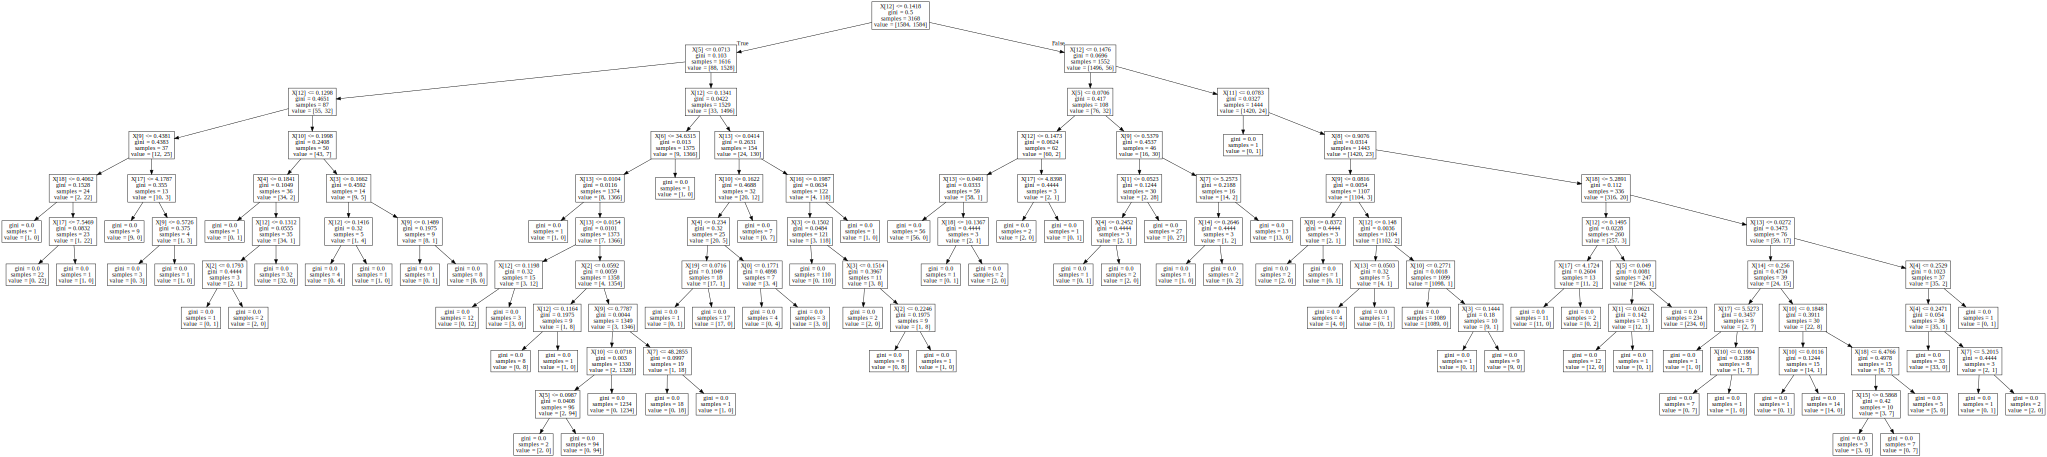

In [70]:
clf = decisionTree.fit(X, Y)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("voice") 
graph

## Random forest

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

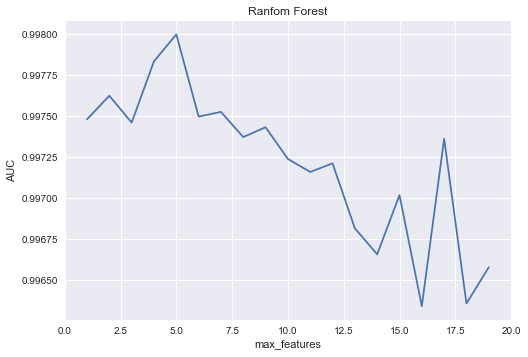

In [76]:
max_features_range = np.arange(1, 20, 1)
scores = []

for num_features in max_features_range:
    rf = RandomForestClassifier(n_estimators = 100, max_features=num_features, min_samples_split=2)
    scores.append(cross_val_score(rf, train_X, train_Y, cv=5, scoring='roc_auc').mean())

plt.plot(max_features_range, scores)
plt.xlim([0.0, 20])
plt.title('Ranfom Forest')
plt.xlabel('max_features')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

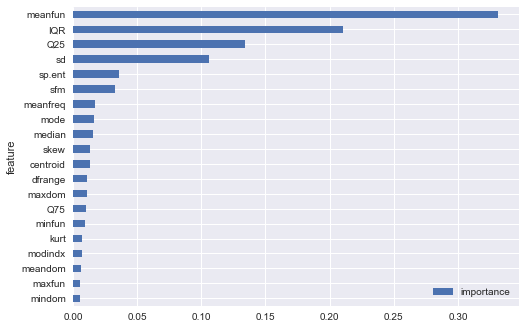

In [77]:
random_forest = RandomForestClassifier(n_estimators = 100, max_features="auto", min_samples_split=2)
model = random_forest.fit(train_X, train_Y)
predictors = [
              'meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
              'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
              'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'
             ]

importances = pd.DataFrame({'feature':predictors,'importance':np.round(random_forest.feature_importances_,20)})
importances = importances.sort_values('importance',ascending=True).set_index('feature')
importances.plot(kind='barh')
plt.show()

In [78]:
rf_best_features = ['meanfun', 'Q25', 'IQR', 'sd', 'sp.ent']

train_X_bext = train_X[rf_best_features]
test_X_best = test_X[rf_best_features]

In [79]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(train_X_bext, train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [80]:
# make class predictions for the testing set
pred_Y = rf.predict(test_X_best)

In [81]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(test_Y, pred_Y))

0.981060606061


In [82]:
print(metrics.confusion_matrix(test_Y, pred_Y))

[[387   5]
 [ 10 390]]


In [83]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(test_Y, pred_Y)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [84]:
# Metrics computed from a confusion matrix
print((TP + TN) / float(TP + TN + FP + FN))

0.981060606061


In [85]:
# Calculate TP rate or recall
print(TP / float(TP + FN))

0.975


In [86]:
# Precision: When a positive value is predicted, how often is the prediction correct?
print(TP / float(TP + FP))

0.987341772152


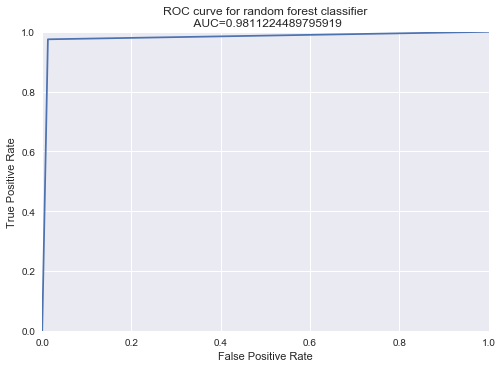

In [87]:
# Plot ROC curves 
fpr, tpr, thresholds = metrics.roc_curve(test_Y, pred_Y)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for random forest classifier\n AUC={auc}'.format(auc=metrics.roc_auc_score(test_Y, pred_Y)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

## SVM

In [88]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [89]:
X_std_train, X_std_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.2, random_state=1)

In [90]:
from sklearn.svm import SVC
from sklearn import metrics

In [91]:
# Default hyperparameters
svc=SVC()
svc.fit(X_std_train, Y_train)
Y_pred = svc.predict(X_std_test)
print('Accuracy Score:', metrics.accuracy_score(Y_test, Y_pred))

Accuracy Score: 0.977917981073


In [92]:
# Default Linear kernel
svc=SVC(kernel='linear')
svc.fit(X_std_train, Y_train)
Y_pred=svc.predict(X_std_test)
print('Accuracy Score:', metrics.accuracy_score(Y_test, Y_pred))

Accuracy Score: 0.977917981073


In [93]:
# Default RBF kernel
svc=SVC(kernel='rbf')
svc.fit(X_std_train, Y_train)
Y_pred=svc.predict(X_std_test)
print('Accuracy Score:', metrics.accuracy_score(Y_test, Y_pred))

Accuracy Score: 0.977917981073


In [94]:
# Default Polynomial kernel
svc=SVC(kernel='poly')
svc.fit(X_std_train,Y_train)
Y_pred=svc.predict(X_std_test)
print('Accuracy Score:', metrics.accuracy_score(Y_test, Y_pred))

Accuracy Score: 0.96214511041


In [95]:
# CV on linear kernel
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X_std, Y, cv=10, scoring='accuracy')
print(scores)

[ 0.91509434  0.96540881  0.96855346  0.97484277  0.96202532  0.99050633
  0.98734177  0.97468354  0.95253165  0.99367089]


In [96]:
print('cv on linear', scores.mean())

cv on linear 0.968465886474


In [97]:
# CV on rbf kernel
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X_std, Y, cv=10, scoring='accuracy') #cv is cross validation
print('cv on rbf', scores.mean())

cv on rbf 0.968461905899


In [98]:
# CV on Polynomial kernel
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X_std, Y, cv=10, scoring='accuracy') #cv is cross validation
print('cv on Polynomial', scores.mean())

cv on Polynomial 0.946079133827


### Find the best C value for linear kernel

The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

Thus for a very large values we can cause overfitting of the model and for a very small value of C we can cause underfitting.Thus the value of C must be chosen in such a manner that it generalised the unseen data well

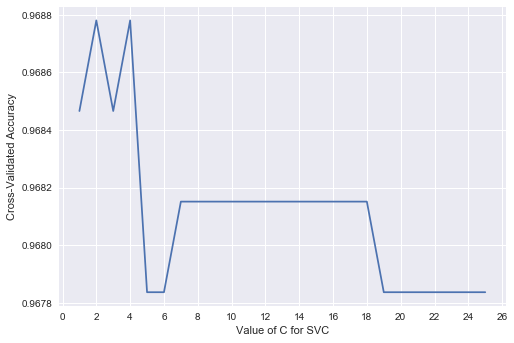

In [99]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X_std, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())

C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

From the above plot we can see that accuracy has been close to 97% for C=1 and C=4 and then it drops around 96.8% and remains constant.

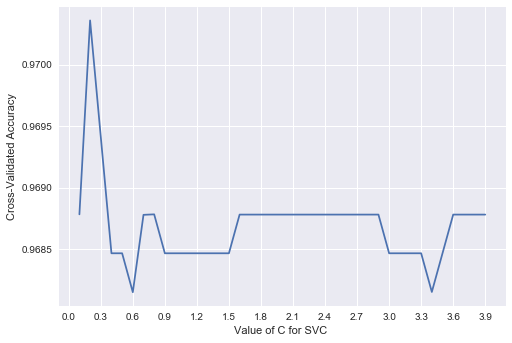

In [100]:
C_range=list(np.arange(0.1,4,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X_std, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())

C_values=list(np.arange(0.1,4,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,4,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Accuracy score is highest for C=0.2

### Find the best gamma value for RBF kernel

Technically, the gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function), which is used as similarity measure between two points. Intuitively, a small gamma value define a Gaussian function with a large variance. In this case, two points can be considered similar even if are far from each other. In the other hand, a large gamma value means define a Gaussian function with a small variance and in this case, two points are considered similar just if they are close to each other

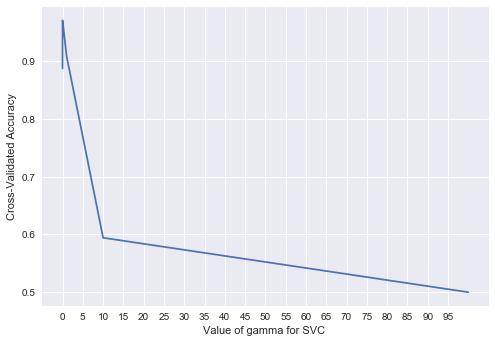

In [101]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X_std, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')
plt.show()

We can see SVC performs poorly between 10 to 100, just reduce the range.

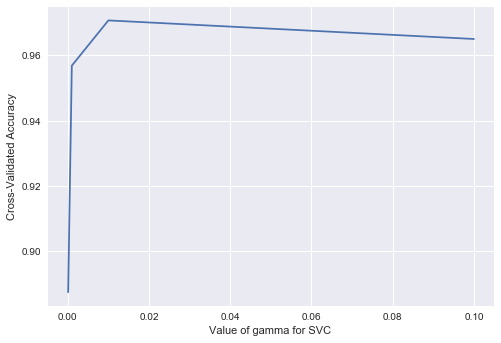

In [102]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X_std, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Reduce the range one more time.

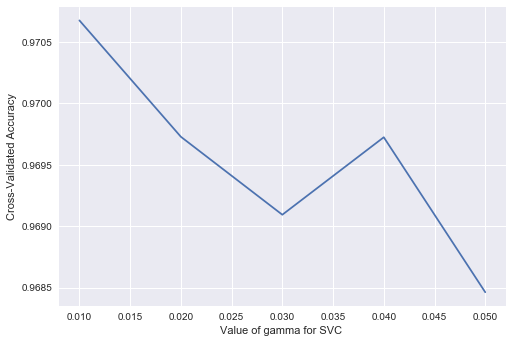

In [103]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X_std, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Accuracy score is highest for gamma=0.01.

 ### Find the best degree value for polynomial kernel

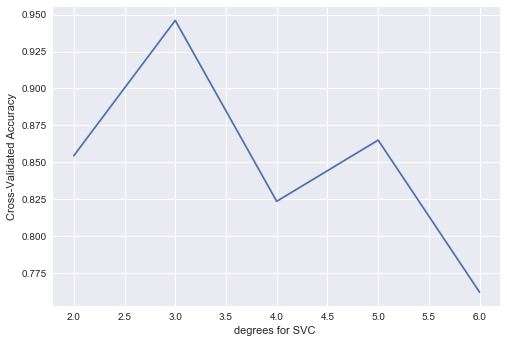

In [104]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X_std, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
    
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score)
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Score is high for third degree polynomial.

In [105]:
# Summary
svc_linear = SVC(kernel='linear', C=0.2)
print('best score for linear kernel:', cross_val_score(svc_linear, X_std, Y, cv=10, scoring='accuracy').mean())

svc_rbf = SVC(kernel='rbf', gamma=0.01)
print('best score for rbf kernel:', cross_val_score(svc_rbf, X_std, Y, cv=10, scoring='accuracy').mean())

svc_poly = SVC(kernel='poly', degree=3)
print('best score for poly kernel:', cross_val_score(svc_poly, X_std, Y, cv=10, scoring='accuracy').mean())

best score for linear kernel: 0.970358649789
best score for rbf kernel: 0.970675105485
best score for poly kernel: 0.946079133827


## TensorFlow Neural Network

In [115]:
#Create classification model. We create a pipeline which has preprocessing model and a DNNClassifier model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

feature_columns = [tf.contrib.layers.real_valued_column("", dimension=20)]

# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 20, 10],
                                            n_classes=3,
                                            model_dir="tf_model")

pipe_tf = Pipeline([('std_scl', StandardScaler()), 
                    ('dnn', classifier)])

In [117]:
# Fit model.
pipe_tf.fit(train_X, train_Y, dnn__steps=10000)

/anaconda/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


Pipeline(steps=[('std_scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dnn', DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x12058b748>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimen...'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None}))])

In [118]:
from sklearn.metrics import accuracy_score

# Evaluate accuracy.
predict = pipe_tf.predict(test_X)
score = accuracy_score(test_Y, list(predict))
print('Accuracy', score)

/anaconda/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


Accuracy 0.97095959596


Summary:

<b>Logistic Regression:</b> 0.987321472509 coming from forward stepwise selection with three features: <b>'meanfun', 'Q75', 'sd'</b>

<b>Desicison Tree:</b> 0.95269882971101028

<b>Random Forest:</b> 0.98112244897959 with five feature: <b>'meanfun', 'Q25', 'IQR', 'sd', 'sp.ent'</b>

<b>SVM:</b> 0.970675105485(RBF kernel gamma=0.01)

<b>NN:</b> ...
